<a href="https://colab.research.google.com/github/HansAlbertLianto/ieee-fraud-detection/blob/master/SMOTEBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [0]:
# Import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Import preprocessing for label encoding purposes
from sklearn import preprocessing

In [0]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

features_to_take = ['TransactionID', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3',
                    'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain',
                    'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D2',
                    'D3', 'D4', 'D5', 'D10', 'D11', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1',
                    'V3', 'V5', 'V7', 'V11', 'V13', 'V14', 'V16', 'V20', 'V24', 'V26', 'V28', 'V30', 'V35', 'V36',
                    'V38', 'V40', 'V41', 'V45', 'V47', 'V49', 'V54', 'V55', 'V56', 'V58', 'V62', 'V65', 'V67', 'V68',
                    'V70', 'V76', 'V78', 'V80', 'V83', 'V87', 'V88', 'V89', 'V91', 'V107', 'V110', 'V112', 'V119',
                    'V121', 'V122', 'V125', 'V131', 'V138', 'V140', 'V142', 'V145', 'V147', 'V162', 'V169', 'V173', 
                    'V174', 'V185', 'V195', 'V210', 'V216', 'V220', 'V222', 'V241', 'V251', 'V271', 'V280', 'V281',
                    'V283', 'V284', 'V286', 'V287', 'V289', 'V291', 'V301', 'V303', 'V305', 'V311', 'V314', 'V323',
                    'V325', 'V335']

features_to_take_id = ['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_09', 'id_10',
                       'id_11', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20',
                       'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37',
                       'id_38', 'DeviceType', 'DeviceInfo']

# ID attributes in 
features_to_take_id_test = [feature.replace('_', '-') for feature in features_to_take_id]

# Mention features encoded to a particular dtype
string_features_train = ['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M4', 'id_12', 'id_15',
                         'id_16', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33', 'id_34', 'DeviceType', 'DeviceInfo']

string_features_test = [feature.replace('_', '-') for feature in string_features_train]

boolean_features = ['M' + str(i) for i in range(1, 10) if i != 4] + ['id_' + str(i) for i in range(35, 39)]

In [0]:
# Uploading the train and test datasets
train_df = pd.read_csv('../dataset/train_transaction.csv', usecols=features_to_take + ['isFraud'])
test_df = pd.read_csv('../dataset/test_transaction.csv', usecols=features_to_take)

train_df_id = pd.read_csv('../dataset/train_identity.csv', usecols=features_to_take_id)
test_df_id = pd.read_csv('../dataset/test_identity.csv', usecols=features_to_take_id_test)

# Left join dataset
train_df = train_df.merge(right=train_df_id, how='left', on='TransactionID')
test_df = test_df.merge(right=test_df_id, how='left', on='TransactionID')

In [0]:
renaming_mapper = dict(zip(features_to_take_id_test, features_to_take_id))

In [0]:
test_df.rename(mapper=renaming_mapper, axis='columns', inplace=True)

In [0]:
# Label encoding preprocessing from sklearn
le = preprocessing.LabelEncoder()

concat_df = pd.concat([train_df, test_df])

for feature in string_features_train:
    train_df[feature] = train_df[feature].astype('str')
    test_df[feature] = test_df[feature].astype('str')
    concat_df[feature] = concat_df[feature].astype('str')
    le.fit(concat_df[feature])
    train_df[feature] = le.transform(train_df[feature])
    test_df[feature] = le.transform(test_df[feature])
    
for feature in boolean_features:
    train_df[feature] = train_df[feature].astype('bool')
    test_df[feature] = test_df[feature].astype('bool')

In [0]:
train_df.head(n=50)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D2,D3,D4,D5,D10,D11,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V3,V5,V7,V11,V13,V14,V16,V20,V24,V26,V28,V30,V35,V36,V38,V40,V41,V45,V47,V49,V54,V55,V56,V58,V62,V65,V67,V68,V70,V76,V78,V80,V83,V87,V88,V89,V91,V107,V110,V112,V119,V121,V122,V125,V131,V138,V140,V142,V145,V147,V162,V169,V173,V174,V185,V195,V210,V216,V220,V222,V241,V251,V271,V280,V281,V283,V284,V286,V287,V289,V291,V301,V303,V305,V311,V314,V323,V325,V335,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.500,4,13926,NaN,150.0,1,142.0,1,315.0,87.0,19.0,NaN,32,32,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,NaN,13.0,NaN,NaN,13.0,13.0,0.0,True,True,True,2,True,True,True,True,True,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,3,2,NaN,NaN,NaN,NaN,2,2,86,136,NaN,461,4,True,True,True,True,2,2740
1,2987001,0,86401,29.000,4,2755,404.0,150.0,2,102.0,1,325.0,87.0,NaN,NaN,16,32,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,True,True,True,0,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,3,2,NaN,NaN,NaN,NaN,2,2,86,136,NaN,461,4,True,True,True,True,2,2740
2,2987002,0,86469,59.000,4,4663,490.0,150.0,4,166.0,2,330.0,87.0,287.0,NaN,36,32,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,NaN,NaN,0.0,NaN,0.0,315.0,315.0,True,True,True,0,True,True,True,True,True,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,3,2,NaN,NaN,NaN,NaN,2,2,86,136,NaN,461,4,True,True,True,True,2,2740
3,2987003,0,86499,50.000,4,18132,567.0,150.0,2,117.0,2,476.0,87.0,NaN,NaN,55,32,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,0.0,94.0,0.0,84.0,NaN,111.0,True,True,True,0,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,135.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,1.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,3,2,NaN,NaN,NaN,NaN,2,2,86,136,NaN,461,4,True,True,True,True,2,2740
4,2987004,0,86506,50.000,1,4497,514.0,150.0,2,102.0,1,420.0,87.0,NaN,NaN,16,32,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True,3,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.0,0.0,0.0,140.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.0,1.0,1.0,1.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,7

In [0]:
test_df.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D2,D3,D4,D5,D10,D11,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V3,V5,V7,V11,V13,V14,V16,V20,V24,V26,V28,V30,V35,V36,V38,V40,V41,V45,V47,V49,V54,V55,V56,V58,V62,V65,V67,V68,V70,V76,V78,V80,V83,V87,V88,V89,V91,V107,V110,V112,V119,V121,V122,V125,V131,V138,V140,V142,V145,V147,V162,V169,V173,V174,V185,V195,V210,V216,V220,V222,V241,V251,V271,V280,V281,V283,V284,V286,V287,V289,V291,V301,V303,V305,V311,V314,V323,V325,V335,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3663549,18403224,31.95,4,10409,111.0,150.0,4,226.0,2,170.0,87.0,1.0,NaN,16,32,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,27.0,398.0,27.0,418.0,203.0,409.0,True,True,True,3,True,True,True,True,True,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,3,2,NaN,NaN,NaN,NaN,2,2,86,136,NaN,461,4,True,True,True,True,2,2740
1,3663550,18403263,49.00,4,4272,111.0,150.0,4,226.0,2,299.0,87.0,4.0,NaN,2,32,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,149.0,7.0,634.0,7.0,231.0,634.0,634.0,True,True,True,0,True,True,True,True,True,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,77.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,3,2,NaN,NaN,NaN,NaN,2,2,86,136,NaN,461,4,True,True,True,True,2,2740
2,3663551,18403310,171.00,4,4476,574.0,150.0,4,226.0,2,472.0,87.0,2635.0,NaN,19,32,2.0,2.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,2.0,0.0,22.0,2.0,137.0,10.0,97.0,10.0,136.0,136.0,97.0,True,True,True,0,True,True,True,True,True,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,2.0,0.0,2.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,3,2,NaN,NaN,NaN,NaN,2,2,86,136,NaN,461,4,True,True,True,True,2,2740
3,3663552,18403310,284.95,4,10989,360.0,150.0,4,166.0,2,205.0,87.0,17.0,NaN,16,32,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,7.0,4.0,42.0,41.0,242.0,41.0,242.0,242.0,242.0,True,True,True,3,True,True,True,True,True,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,2.0,2.0,0.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.000000,282.540009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,3,2,NaN,NaN,NaN,NaN,2,2,86,136,NaN,461,4,True,True,True,True,2,2740
4,3663553,18403317,67.95,4,18018,452.0,150.0,2,117.0,2,264.0,87.0,6.0,NaN,16,32,6.0,6.0,0.0,0.0,2.0,5.0,0.0,0.0,5.0,0.0,6.0,0.0,14.0,6.0,22.0,0.0,22.0,0.0,22.0,22.0,22.0,True,True,True,3,True,True,True,True,True,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,67.949997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,67.949997,183.8

In [0]:
# X contains all features in train dataset except for the isFraud column
X = train_df.loc[:,train_df.columns!="isFraud"]

In [0]:
# Counts the number of 0 labels in isFraud
train_df.loc[train_df.isFraud == 0, 'isFraud'].count()

569877

In [0]:
# Counts the number of 1 labels in isFraud
train_df.loc[train_df.isFraud == 1, 'isFraud'].count()

In [0]:
X.head()
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Columns: 157 entries, TransactionID to DeviceInfo
dtypes: bool(12), float64(125), int64(20)
memory usage: 664.6 MB


In [0]:
# Y contains the isFraud column
Y = train_df.loc[:,train_df.columns=="isFraud"]

In [0]:
Y.head()

,isFraud
0,0
1,0
2,0
3,0
4,0


In [0]:
# Replace N/A values in X with mean of X
X.fillna(X.mean(), inplace=True)
X.head()
X.info()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Columns: 157 entries, TransactionID to DeviceInfo
dtypes: bool(12), float64(125), int64(20)
memory usage: 664.6 MB


In [0]:
# Replace N/A values in Y with mean of Y
Y.fillna(Y.mean(), inplace=True)
Y.head()
Y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   isFraud  590540 non-null  int64
dtypes: int64(1)
memory usage: 9.0 MB


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [0]:
# Gets values of X and Y for train-test splitting
Y_NUMPY = Y.values
X_NUMPY = X.values

In [0]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Train test split (70-30 train-test) for cross validation
X_train, X_test, y_train, y_test = train_test_split(X_NUMPY, Y_NUMPY, test_size=0.3, random_state=0)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Number transactions X_train dataset:  (413378, 157)
Number transactions y_train dataset:  (413378, 1)
Number transactions X_test dataset:  (177162, 157)
Number transactions y_test dataset:  (177162, 1)


In [0]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

# Does SMOTE to balance the dataset
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': [14542]
Before OverSampling, counts of label '0': [398836] 



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (797672, 157)
After OverSampling, the shape of train_y: (797672,) 

After OverSampling, counts of label '1': 398836
After OverSampling, counts of label '0': 398836


In [0]:
# Training of AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=100, random_state=42)
model.fit(X_train_res, y_train_res)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=42)

In [0]:
# Predict on validation set
predictions = model.predict(X_test)

In [0]:
from sklearn.metrics import confusion_matrix
cnf_matrix_tra = confusion_matrix(y_test, predictions)

Recall metric in the train dataset: 39.50334912595981%
Normalized confusion matrix
[[0.97722184 0.02277816]
 [0.60496651 0.39503349]]


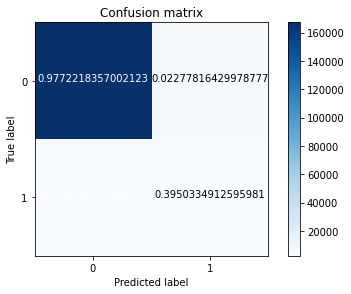

In [0]:
# Function for plotting custom confusion matrix
# We normalize the valuesimport itertools

def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

print("Recall metric in the train dataset: {}%".format(100*cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]+cnf_matrix_tra[1,1])))


class_names = [0,1]
plt.figure()

# Plotting the confusion matrix
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()

In [0]:
# For kaggle submission
# Separates the test dataset into X and Y as we did to the training dataset
X_TEST = test_df.loc[:,test_df.columns!="isFraud"]
Y_TEST = test_df.loc[:,test_df.columns=="isFraud"]

X_TEST.fillna(X_TEST.mean(), inplace=True)
Y_TEST.fillna(Y_TEST.mean(), inplace=True)

Y_TEST_NUMPY = Y_TEST.values
X_TEST_NUMPY = X_TEST.values

In [0]:
# Predict on test dataset for kaggle submission
predictions_test = model.predict(X_TEST_NUMPY)

In [0]:
predictions_test

array([0, 0, 0, ..., 0, 0, 0])

In [0]:
# Create a DataFrame with the transaction ids and our prediction
submission = pd.DataFrame({'TransactionID': test_df['TransactionID'], 'isFraud': predictions_test})

# Visualize the first 5 rows
submission.head()

,TransactionID,isFraud
0,3663549,0
1,3663550,0
2,3663551,0
3,3663552,0
4,3663553,0


In [0]:
# Convert DataFrame to a csv file that can be uploaded
filename = 'POP.csv'
submission.to_csv(filename, index=False)
